# library used in preprocessing 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('all_perth_310121.csv')
df.head()

,SUBURB,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,PRICE
0,South Lake,4,2,2.0,600,160,2003.0,18300,1800,-32.115900,115.842450,0.828339,565000
1,Wandi,3,2,2.0,351,139,2013.0,26900,4900,-32.193470,115.859554,5.524324,365000
2,Camillo,3,1,1.0,719,86,1979.0,22600,1900,-32.120578,115.993579,1.649178,287000
3,Bellevue,2,1,2.0,651,59,1953.0,17900,3600,-31.900547,116.038009,1.571401,255000
4,Lockridge,4,1,2.0,466,131,1998.0,11200,2000,-31.885790,115.947780,1.514922,325000


In [3]:
df.columns=df.columns.str.title()

In [4]:
df.dtypes

Suburb               object
Bedrooms              int64
Bathrooms             int64
Garage              float64
Land_Area             int64
Floor_Area            int64
Build_Year          float64
Cbd_Dist              int64
Nearest_Stn_Dist      int64
Latitude            float64
Longitude           float64
Nearest_Sch_Dist    float64
Price                 int64
dtype: object

In [5]:
df.isna().sum()

Suburb                 0
Bedrooms               0
Bathrooms              0
Garage              2478
Land_Area              0
Floor_Area             0
Build_Year          3155
Cbd_Dist               0
Nearest_Stn_Dist       0
Latitude               0
Longitude              0
Nearest_Sch_Dist       0
Price                  0
dtype: int64

In [6]:
df['Price'].describe().T

count    3.365600e+04
mean     6.370720e+05
std      3.558256e+05
min      5.100000e+04
25%      4.100000e+05
50%      5.355000e+05
75%      7.600000e+05
max      2.440000e+06
Name: Price, dtype: float64

# dealing with null values 

In [7]:
df=df.dropna()#gives us more accuracy
df.isna().sum()

Suburb              0
Bedrooms            0
Bathrooms           0
Garage              0
Land_Area           0
Floor_Area          0
Build_Year          0
Cbd_Dist            0
Nearest_Stn_Dist    0
Latitude            0
Longitude           0
Nearest_Sch_Dist    0
Price               0
dtype: int64

In [8]:
df.corr().sort_values("Price")

C:\Users\alhos\AppData\Local\Temp\ipykernel_33520\1360740478.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().sort_values("Price")


,Bedrooms,Bathrooms,Garage,Land_Area,Floor_Area,Build_Year,Cbd_Dist,Nearest_Stn_Dist,Latitude,Longitude,Nearest_Sch_Dist,Price
Cbd_Dist,0.124732,0.033202,0.044722,0.118489,0.016412,0.273701,1.000000,0.433592,-0.202274,-0.072417,0.362129,-0.357453
Longitude,-0.013366,-0.090333,0.091368,0.137367,-0.050539,-0.054731,-0.072417,0.486750,-0.109486,1.000000,0.294883,-0.181655
Build_Year,0.221965,0.343458,0.040371,0.005000,0.222725,1.000000,0.273701,0.109612,0.047610,-0.054731,0.112204,-0.160879
Nearest_Stn_Dist,0.110193,0.048709,0.108138,0.211554,0.104992,0.109612,0.433592,1.000000,0.031940,0.486750,0.617320,-0.089042
Nearest_Sch_Dist,0.093618,0.071703,0.093924,0.252992,0.116835,0.112204,0.362129,0.617320,-0.002020,0.294883,1.000000,-0.012110
Latitude,0.025772,0.054968,-0.016187,-0.011379,0.047260,0.047610,-0.202274,0.031940,1.000000,-0.109486,-0.002020,0.052122
Land_Area,0.050623,0.031912,0.053780,1.000000,0.065111,0.005000,0.118489,0.211554,-0.011379,0.137367,0.252992,0.055033
Garage,0.190634,0.181865,1.000000,0.053780,0.196639,0.040371,0.044722,0.108138,-0.016187,0.091368,0.093924,0.129476
Bedrooms,1.000000,0.565302,0.190634,0.050623,0.551400,0.221965,0.124732,0.110193,0.025772,-0.013366,0.093618,0.269255
Bathrooms,0.565302,1.000000,0.181865,0.031912,0.579982,0.343458,0.033202,0.048709,0.054968,-0.090333,0.071703,0.392904


In [9]:
#the other null values if replaced will be a biased cause these information couldnt be achieved so the best thing to do is
#to drop the null 
df.isna().sum()


Suburb              0
Bedrooms            0
Bathrooms           0
Garage              0
Land_Area           0
Floor_Area          0
Build_Year          0
Cbd_Dist            0
Nearest_Stn_Dist    0
Latitude            0
Longitude           0
Nearest_Sch_Dist    0
Price               0
dtype: int64

C:\Users\alhos\AppData\Local\Temp\ipykernel_33520\1929061625.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().sort_values("Price"), cmap="YlGnBu", annot=True)


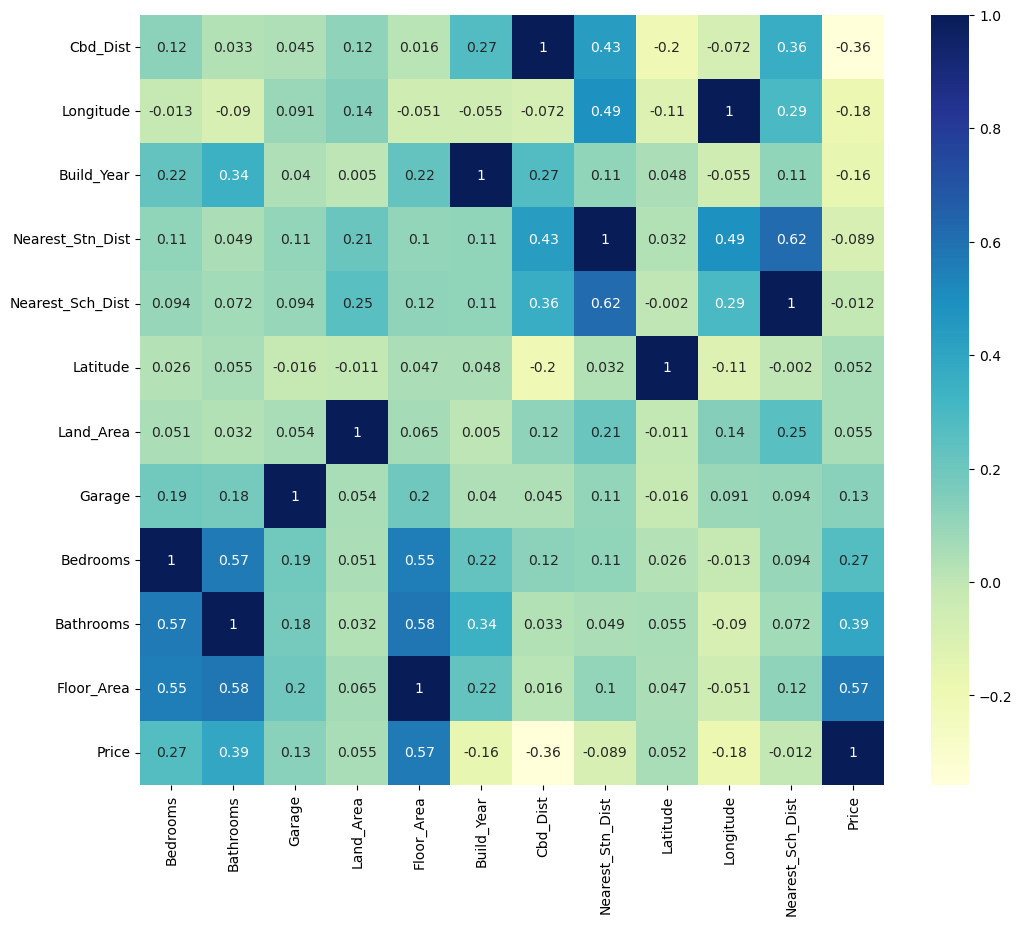

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr().sort_values("Price"), cmap="YlGnBu", annot=True)
plt.show()

# dealing with textual data

how to deal with column suburb

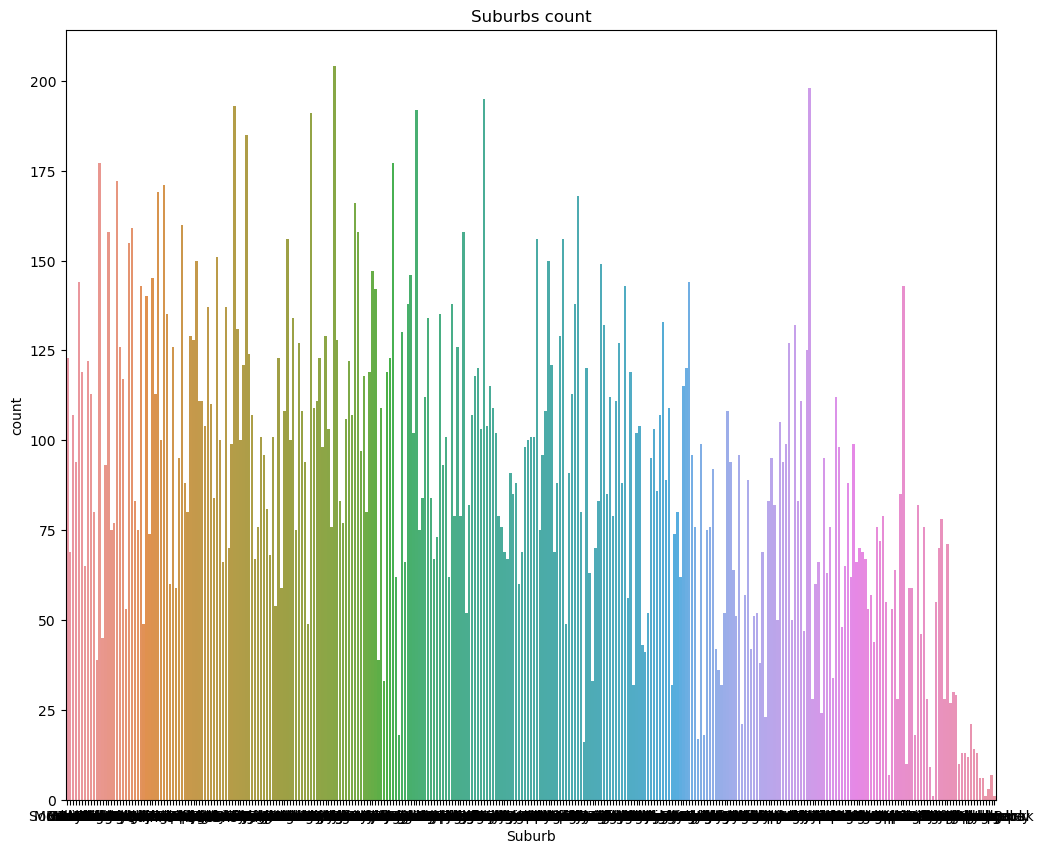

In [11]:
plt.figure(figsize=(12, 10))
plt.title("Suburbs count");
sns.countplot(data=df,x="Suburb");


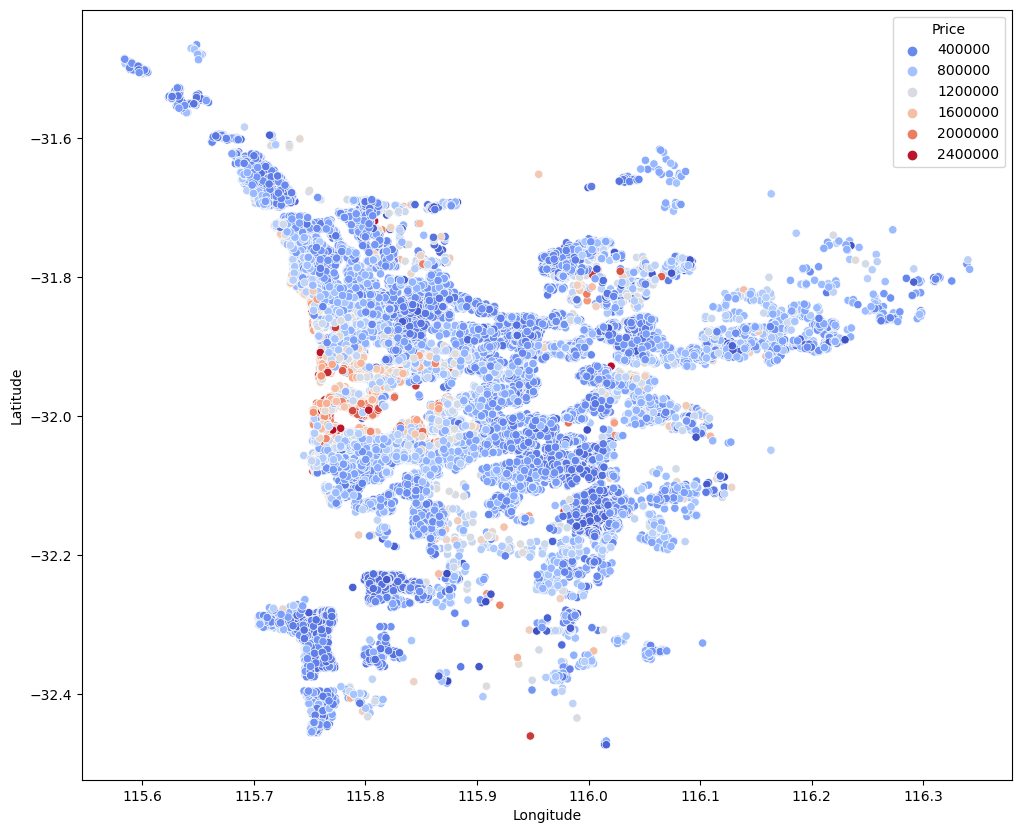

In [15]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df,x='Longitude',y='Latitude',hue='Price',palette='coolwarm')
plt.show()

you cant analys the plot but you're sure now that the're is more value than you could actually normal encode it 

# target encoding with labels mean for each suburb 

In [16]:
#target encoding
df['Suburb'] = df['Suburb'].map(df.groupby('Suburb')['Price'].mean())

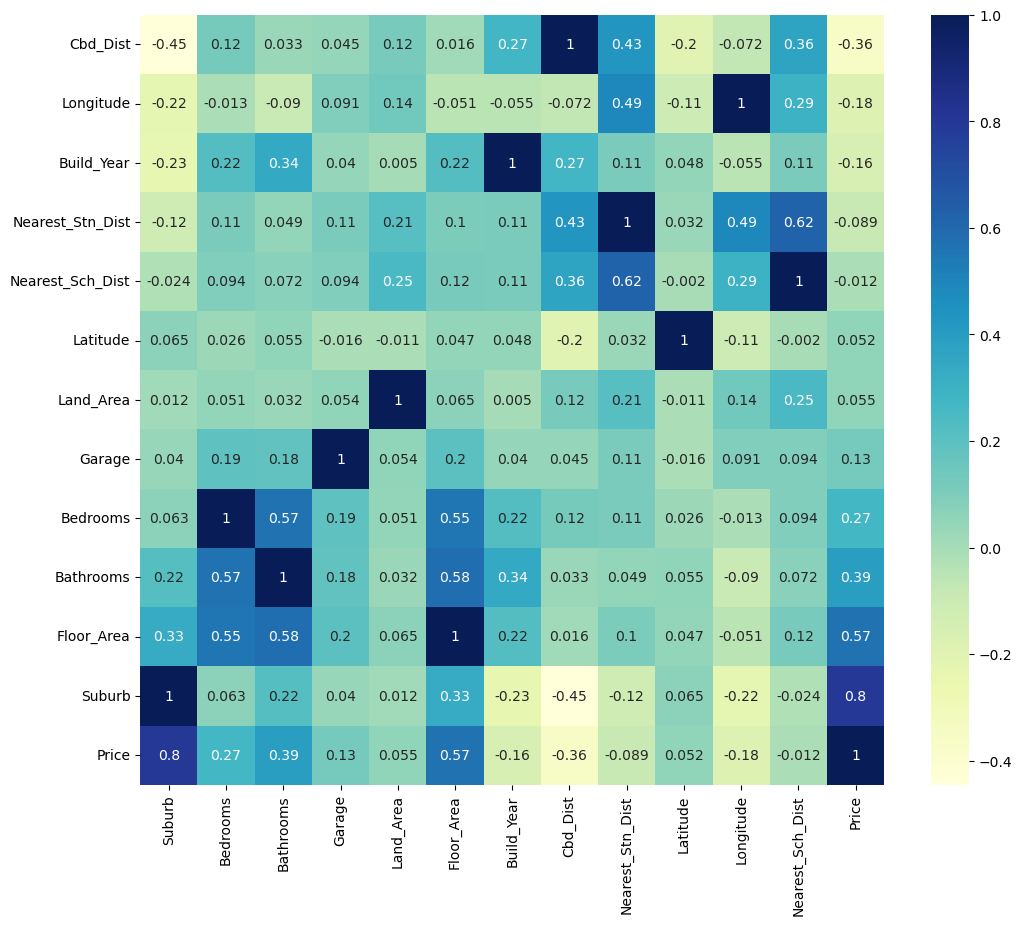

In [17]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr().sort_values("Price"), cmap="YlGnBu", annot=True)
plt.show()

In [18]:
df.head()

,Suburb,Bedrooms,Bathrooms,Garage,Land_Area,Floor_Area,Build_Year,Cbd_Dist,Nearest_Stn_Dist,Latitude,Longitude,Nearest_Sch_Dist,Price
0,445346.398374,4,2,2.0,600,160,2003.0,18300,1800,-32.115900,115.842450,0.828339,565000
1,548557.971014,3,2,2.0,351,139,2013.0,26900,4900,-32.193470,115.859554,5.524324,365000
2,294023.364486,3,1,1.0,719,86,1979.0,22600,1900,-32.120578,115.993579,1.649178,287000
3,368683.404255,2,1,2.0,651,59,1953.0,17900,3600,-31.900547,116.038009,1.571401,255000
4,357095.652778,4,1,2.0,466,131,1998.0,11200,2000,-31.885790,115.947780,1.514922,325000


# more features can we exctract? 

In [19]:
#adding the size of each room could be helpfull for our analysis 
df['Average_Room']=df['Floor_Area']/(df['Bedrooms']+df['Bathrooms'])
df.head()

,Suburb,Bedrooms,Bathrooms,Garage,Land_Area,Floor_Area,Build_Year,Cbd_Dist,Nearest_Stn_Dist,Latitude,Longitude,Nearest_Sch_Dist,Price,Average_Room
0,445346.398374,4,2,2.0,600,160,2003.0,18300,1800,-32.115900,115.842450,0.828339,565000,26.666667
1,548557.971014,3,2,2.0,351,139,2013.0,26900,4900,-32.193470,115.859554,5.524324,365000,27.800000
2,294023.364486,3,1,1.0,719,86,1979.0,22600,1900,-32.120578,115.993579,1.649178,287000,21.500000
3,368683.404255,2,1,2.0,651,59,1953.0,17900,3600,-31.900547,116.038009,1.571401,255000,19.666667
4,357095.652778,4,1,2.0,466,131,1998.0,11200,2000,-31.885790,115.947780,1.514922,325000,26.200000


<Axes: >

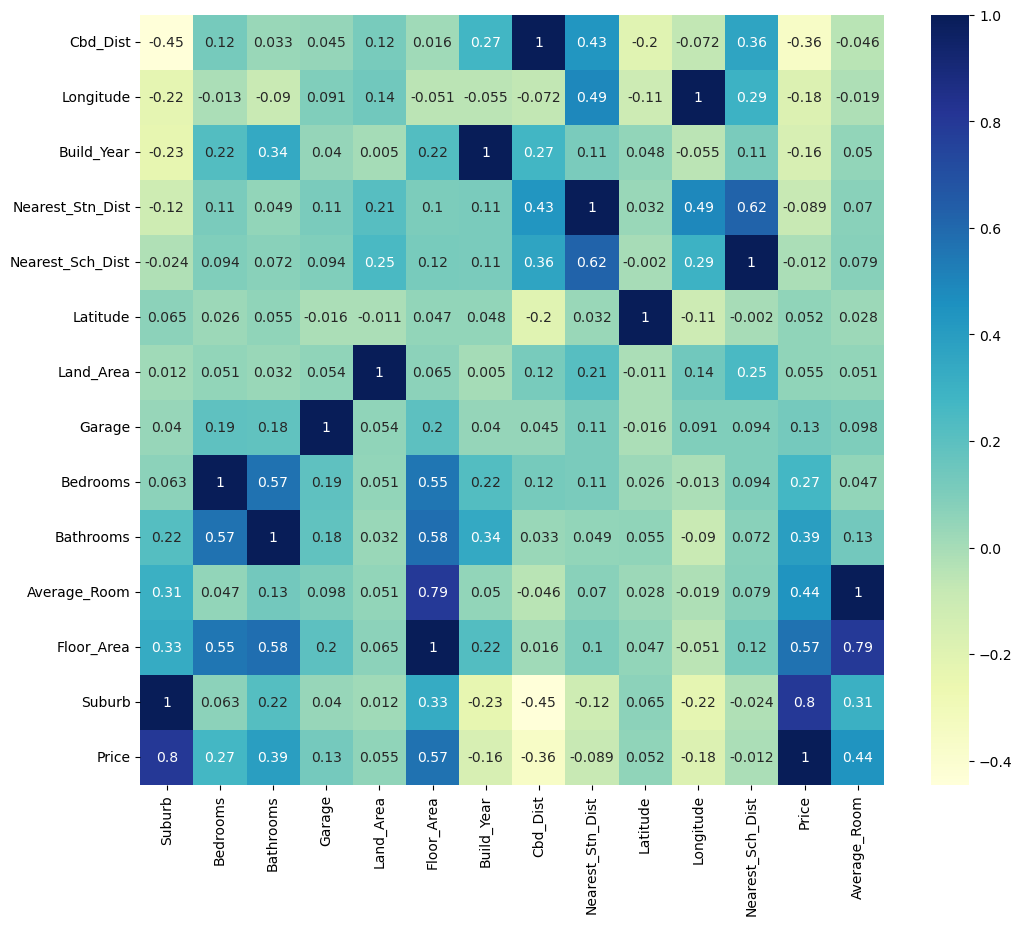

In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr().sort_values("Price"), cmap="YlGnBu", annot=True)

# test-split-predict!


In [21]:
X=df.drop('Price',axis=1)
y=df['Price']
#droping the target for the features and move it to the label

In [22]:
X.head()

,Suburb,Bedrooms,Bathrooms,Garage,Land_Area,Floor_Area,Build_Year,Cbd_Dist,Nearest_Stn_Dist,Latitude,Longitude,Nearest_Sch_Dist,Average_Room
0,445346.398374,4,2,2.0,600,160,2003.0,18300,1800,-32.115900,115.842450,0.828339,26.666667
1,548557.971014,3,2,2.0,351,139,2013.0,26900,4900,-32.193470,115.859554,5.524324,27.800000
2,294023.364486,3,1,1.0,719,86,1979.0,22600,1900,-32.120578,115.993579,1.649178,21.500000
3,368683.404255,2,1,2.0,651,59,1953.0,17900,3600,-31.900547,116.038009,1.571401,19.666667
4,357095.652778,4,1,2.0,466,131,1998.0,11200,2000,-31.885790,115.947780,1.514922,26.200000


In [23]:
y.head()

0    565000
1    365000
2    287000
3    255000
4    325000
Name: Price, dtype: int64

# normalize the data 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [25]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Suburb,28256.0,643242.940260,285524.207326,170000.000000,446947.701299,552663.513514,768243.737500,1.959224e+06
Bedrooms,28256.0,3.674052,0.740086,1.000000,3.000000,4.000000,4.000000,1.000000e+01
Bathrooms,28256.0,1.841096,0.583575,1.000000,2.000000,2.000000,2.000000,1.600000e+01
Garage,28256.0,2.196454,1.374265,1.000000,2.000000,2.000000,2.000000,9.900000e+01
Land_Area,28256.0,2492.261891,16585.470820,61.000000,504.000000,681.000000,822.000000,9.999990e+05
Floor_Area,28256.0,183.334230,71.673003,1.000000,130.000000,172.000000,222.000000,8.490000e+02
Build_Year,28256.0,1989.967830,20.676720,1868.000000,1979.000000,1995.000000,2005.000000,2.017000e+03
Cbd_Dist,28256.0,19546.692773,11278.859142,681.000000,11100.000000,17200.000000,26200.000000,5.980000e+04
Nearest_Stn_Dist,28256.0,4414.440650,4344.227183,46.000000,1700.000000,3200.000000,5200.000000,3.550000e+04
Latitude,28256.0,-31.959429,0.176226,-32.472979,-32.064955,-31.931758,-31.843060,-3.146582e+01


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#split 

In [27]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [28]:
pd.DataFrame(X_train).describe().T

,count,mean,std,min,25%,50%,75%,max
0,22604.0,-9.493183e-17,1.000022,-1.514575,-0.686313,-0.317184,0.427171,4.594113
1,22604.0,-1.628301e-16,1.000022,-3.611364,-0.912497,0.436936,0.436936,8.533535
2,22604.0,8.895930e-17,1.000022,-1.436830,0.267073,0.267073,0.267073,24.121715
3,22604.0,1.109634e-16,1.000022,-0.852021,-0.141564,-0.141564,-0.141564,68.772838
4,22604.0,7.229908e-18,1.000022,-0.139063,-0.114042,-0.103965,-0.095983,56.466922
5,22604.0,-8.518717e-17,1.000022,-2.552959,-0.745758,-0.157367,0.543098,9.326934
6,22604.0,1.836082e-15,1.000022,-5.806900,-0.534235,0.239734,0.723465,1.303942
7,22604.0,-1.241658e-16,1.000022,-1.675240,-0.752509,-0.212278,0.584783,3.560478
8,22604.0,4.369379e-17,1.000022,-1.002296,-0.624285,-0.281469,0.175619,7.100497
9,22604.0,-8.552666e-15,1.000022,-2.905841,-0.601612,0.157530,0.666125,2.795543


In [29]:
X_train

array([[ 0.01669888, -0.91249719,  0.26707345, ...,  0.21217237,
        -0.51422712, -0.82422183],
       [-0.11579729, -0.91249719, -1.43682953, ...,  0.30124776,
         0.25031371, -0.1904332 ],
       [-0.45706712, -2.2619304 , -1.43682953, ...,  1.58904547,
         0.11232536,  6.05142446],
       ...,
       [-0.84866143,  0.43693601,  0.26707345, ...,  0.74194094,
        -0.10854123, -1.11870947],
       [-1.00004984, -0.91249719,  0.26707345, ...,  0.58642904,
        -0.3657303 ,  0.30891541],
       [ 0.60190267,  0.43693601,  0.26707345, ...,  0.05039031,
        -0.25246622, -0.03038557]])

In [30]:
X_test

array([[-0.8571134 , -0.91249719, -1.43682953, ...,  0.91120758,
        -0.57489419, -0.81461897],
       [-0.55689851,  0.43693601,  0.26707345, ..., -0.66241506,
         0.57411978,  0.06564301],
       [-0.57414383, -0.91249719,  0.26707345, ...,  0.72257084,
         0.65245131, -1.05469042],
       ...,
       [-0.87384097, -0.91249719,  0.26707345, ..., -2.14784679,
         0.19488895,  0.27050398],
       [ 0.66066185,  0.43693601,  0.26707345, ...,  0.950546  ,
         0.78123544, -0.39849512],
       [-0.91661632,  0.43693601,  0.26707345, ..., -0.66347694,
        -0.42724272,  0.17767635]])

# predictions

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [32]:
y_pred

array([253668.59439537, 522790.91970836, 382123.45040576, ...,
       330846.1631298 , 784096.36182529, 418063.09848288])

In [33]:
y_test

8940     320000
5001     505000
28288    388000
17565    730000
2638     915000
          ...  
3954     647000
23975    775000
33007    320000
22127    750000
4768     450000
Name: Price, Length: 5652, dtype: int64

# Evaluate our model

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error ,median_absolute_error,mean_squared_error

MdSEValue = median_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print('Mde:',MdSEValue)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')
print('reg score ,test : ',regressor.score(X_test,y_test))
print('reg score ,train : ',regressor.score(X_train,y_train))

Mde: 69958.36489201686
MSE: 30988708864.10156
RMSE: 176036.10102504987
R2 Score: 0.7561091306885459
reg score ,test :  0.7561091306885459
reg score ,train :  0.7688092825185864


In [35]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(regressor, X, y, cv=7)  # cv is the number of folds (e.g., 7)

# Display the cross-validated scores
print("Cross-validated Scores:")
for score in cv_scores:
    print(f"{score:.4f}")

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'\nMean Squared Error: {mse}')

Cross-validated Scores:
0.7714
0.7491
0.7521
0.7566
0.7895
0.7649
0.7740

Mean Squared Error: 30988708864.10156


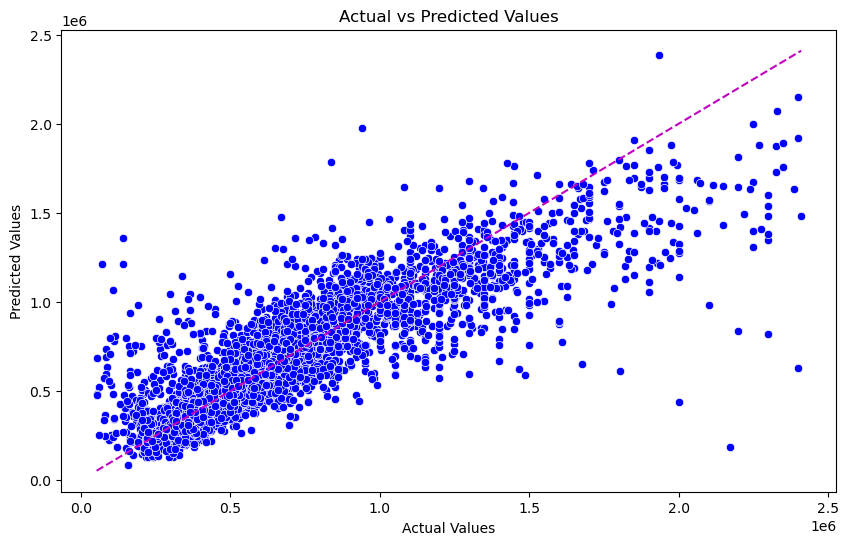

In [36]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=y_pred, color='blue')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

plt.show()


# KNN as regressor

In [37]:
from sklearn.neighbors import KNeighborsRegressor
X_ktrain=X_train
X_ktest=X_test
Kregressors = KNeighborsRegressor(n_neighbors = 20, p = 1)
#p=2 means using eculdian distance
#p=1 means manhattan which gice us better accuracy 
Kregressors.fit(X_ktrain, y_train)
knn_y_pred=Kregressors.predict(X_ktest)


In [38]:
print( 'training accuaracy:', {100*Kregressors.score(X_ktrain,y_train)}) 
print( 'testing accuaracy:', {100*Kregressors.score(X_ktest,y_test)}) 

training accuaracy: {82.3550946090696}
testing accuaracy: {78.54884103709976}


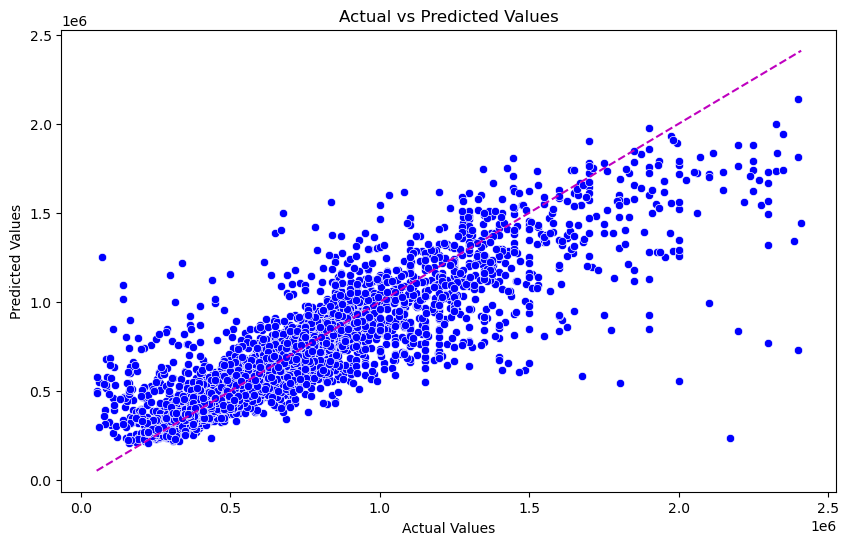

In [39]:

plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=knn_y_pred, color='blue')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

plt.show()


In [40]:
resaults=pd.DataFrame(y_test)

In [41]:
resaults['linearreg']=y_pred

In [42]:
resaults['kreg']=knn_y_pred

In [43]:
resaults

,Price,linearreg,kreg
8940,320000,253668.594395,323350.0
5001,505000,522790.919708,501875.0
28288,388000,382123.450406,361475.0
17565,730000,721930.768316,704037.5
2638,915000,831982.004532,767550.0
...,...,...,...
3954,647000,778235.400851,698300.0
23975,775000,859236.312019,724150.0
33007,320000,330846.163130,374900.0
22127,750000,784096.361825,804100.0


<Axes: >

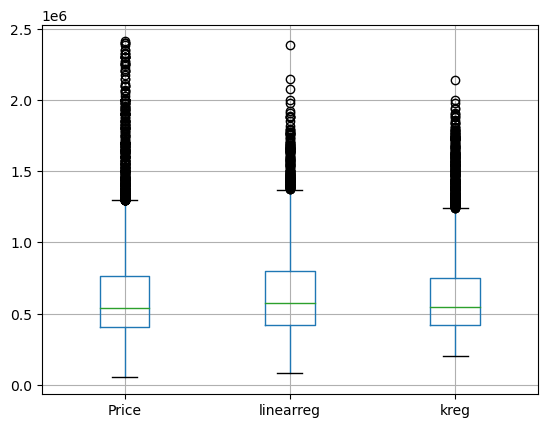

In [44]:
resaults.boxplot()
#higher mean for linear regression

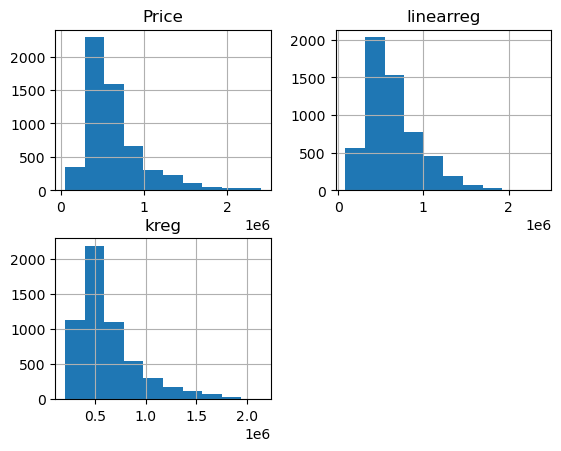

In [45]:
resaults.hist()
plt.show()

In [46]:
resaults.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,5652.0,644711.003715,356485.929589,53000.000000,410000.000000,541000.000000,765000.000000,2.410000e+06
linearreg,5652.0,642998.989596,308781.415744,85245.875025,418976.614352,574151.417254,800825.221664,2.385562e+06
kreg,5652.0,630714.685297,301326.162558,205900.000000,423850.625000,545400.000000,750643.750000,2.136600e+06


# Additional technique and GS

In [47]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
ylasso_pred = lasso.predict(X_test)
print('reg score ,test : ',lasso.score(X_test,y_test))
print('reg score ,train : ',lasso.score(X_train,y_train))

reg score ,test :  0.7561091293066196
reg score ,train :  0.7688092825185482


In [48]:
# Ridge Model
from sklearn.linear_model import Ridge

scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
    
print("Ridge Scores:")
for score in scores:
    print(f"{score:.4f}")

Ridge Scores:
0.7561
0.7561
0.7561
0.7559
0.7535


In [49]:
# Importing Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Defining the parameters 
knn_params = {
    "n_neighbors": range(1, 11),
    "weights": ["uniform", "distance"], # Weights for weight funciton
    "p": [1, 2],  # Values for the power parameter
}

knn = KNeighborsRegressor()

# Grid
# To change the scoring metric use the metric in refit
grid_search = GridSearchCV(estimator=knn, param_grid=knn_params, n_jobs=-1, cv=5, scoring=["r2", "neg_mean_squared_error"], refit="r2")
grid_results = grid_search.fit(X_train, y_train)

final_model = knn.set_params(**grid_results.best_params_)
final_model.fit(X_train, y_train)
y_grid_pred = final_model.predict(X_test)

print(f'score : {100*grid_results.best_score_}')
print('params : ' , grid_results.best_params_)
print('best : ' , grid_results.best_estimator_)

score : 80.04430204613678
params :  {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
best :  KNeighborsRegressor(n_neighbors=10, p=1, weights='distance')
